### Introduction (Data Description and Objective)

### Data Set Information:

> Extraction was done from the 1994 Census database.
> Prediction task is to determine whether a person makes over 50K a year.

### Summary of Dataset:

**The Census Income dataset has 48,842 entries. Each entry contains the following information about an individual:**

<h4>age:</h4>
 
* the age of an individual

<h4>workclass:</h4> 

* a general term to represent the employment status of an individual

<h4>fnlwgt:</h4> 

* final weight. In other words, this is the number of people the census believes the entry represents..

<h4>education:</h4> 

* the highest level of education achieved by an individual.

<h4>education­num:</h4> 

* the highest level of education achieved in numerical form.

<h4>marital­status:</h4> 

* marital status of an individual. 

<h4>occupation:</h4> 

* the general type of occupation of an individual

<h4>relationship:</h4> 

* represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute and is somewhat redundant with marital status. We might not make use of this attribute at all

<h4>race:</h4> 

* Descriptions of an individual’s race

<h4>sex:</h4> 

* the biological sex of the individual

<h4>capital­gain:</h4> 

* capital gains for an individual

<h4>capital­loss:</h4> 
 
* capital loss for an individual

<h4>hours­per­week:</h4> 

* the hours an individual has reported to work per week

<h4>native­country:</h4> 

* country of origin for an individual

<h4>income:</h4> 

* whether or not an individual makes more than 50,000 annually.


## Step - 2 - Import the data and perform basic pandas operations.

In [31]:
#
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import svm
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split,cross_val_score

In [32]:
adult=pd.read_csv(r'C:\Users\ANIL\Downloads\adult.csv')
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Exploratory Data Analysis
   Exploratory Data Analysis regers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.
   
   
    1. we need to know what is the data how the relation between features
    2. In this EDA part we need to handle missing_value,outliers



In [33]:
adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [34]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Treat the Missing Values

In [35]:
adult.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [36]:
adult.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [37]:
adult['occupation'].replace('?',np.NaN,inplace=True)
adult['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

- In this adult data we have some missing value in "?" type. So we need to removed that qustion marks or replaced with np.nan 

In [38]:
adult.shape

(48842, 15)

In [39]:
adult['workclass'].replace('?',np.NaN,inplace=True)
adult['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [40]:
adult['native-country'].replace('?',np.NaN,inplace=True)
adult['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [41]:
adult['workclass'].mode()

0    Private
dtype: object

In [42]:
adult['native-country'].mode()

0    United-States
dtype: object

In [43]:
adult['occupation'].mode()

0    Prof-specialty
dtype: object

In [44]:
adult.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [45]:
adult.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [46]:
x=adult.mean()
x

age                    38.643585
fnlwgt             189664.134597
educational-num        10.078089
capital-gain         1079.067626
capital-loss           87.502314
hours-per-week         40.422382
dtype: float64

In [47]:
adult.median()

age                    37.0
fnlwgt             178144.5
educational-num        10.0
capital-gain            0.0
capital-loss            0.0
hours-per-week         40.0
dtype: float64

In [48]:
adult.mode()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,36,Private,203488,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K


## Treat the Outliers 

#### By using boxplot we have to identify outlayes in numerical columns
- **"age","fnlwgt","educational","capital-gain","capital-loss","hours-per-week" have some outliers soo we need figure out them by using boxplot**

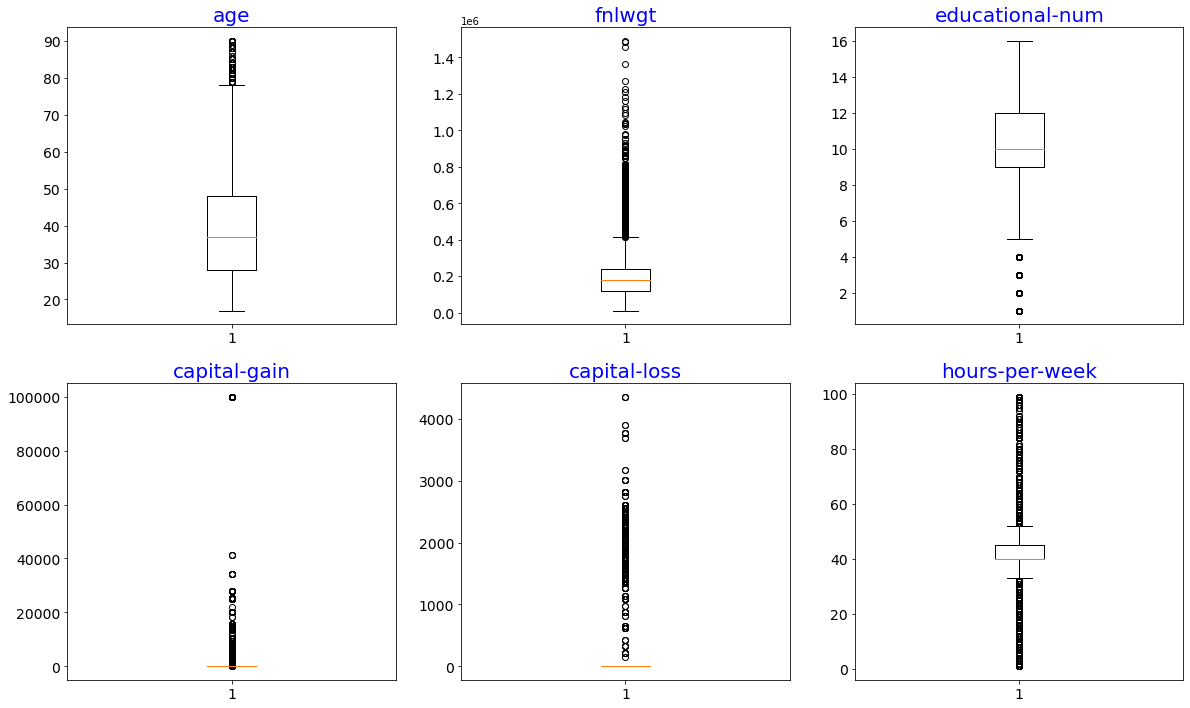

In [49]:
plt.figure(figsize=(20,12))


num_features = adult.select_dtypes(include=['int64']).columns

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.boxplot(adult[num_features[i]])
    plt.title(num_features[i],color="b",fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)

In [50]:
lower_bound =0.1
upper_bound=0.95
res = adult.quantile([lower_bound,upper_bound])
res

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0.10,22.0,65738.20,7.0,0.0,0.0,24.0
0.95,63.0,379481.65,14.0,5013.0,0.0,60.0


# Winsorizing

1.Analyze your data to make sure the outlier isn’t a result of measurement error or some other fixable error.

2.Decide how much Winsorization you want. This is specified as a total percentage of untouched data. For example, if you want to Winsorize the top 5% and bottom 5% of data points, this is equal to 100% – 5% – 5% = 90% Winsorization. A 80% Winsorization means that 10% is modified from each tail area (see Tips on Cut-Off Point Selection below).

3.Replace the extreme values by the maximum and/or minimum values at the threshold

In [51]:
from scipy.stats.mstats import winsorize
adult["age"]           = winsorize(adult["age"],(0,0.10))
adult["fnlwgt"]        = winsorize(adult["fnlwgt"],(0,0.10))
adult["educational-num"]  = winsorize(adult["educational-num"],(0,0.099))
adult["capital-gain"]  = winsorize(adult["capital-gain"],(0,0.099))
adult["capital-loss"]  = winsorize(adult["capital-loss"],(0,0.099))
adult["hours-per-week"]= winsorize(adult["hours-per-week"],(0.10,0.20))

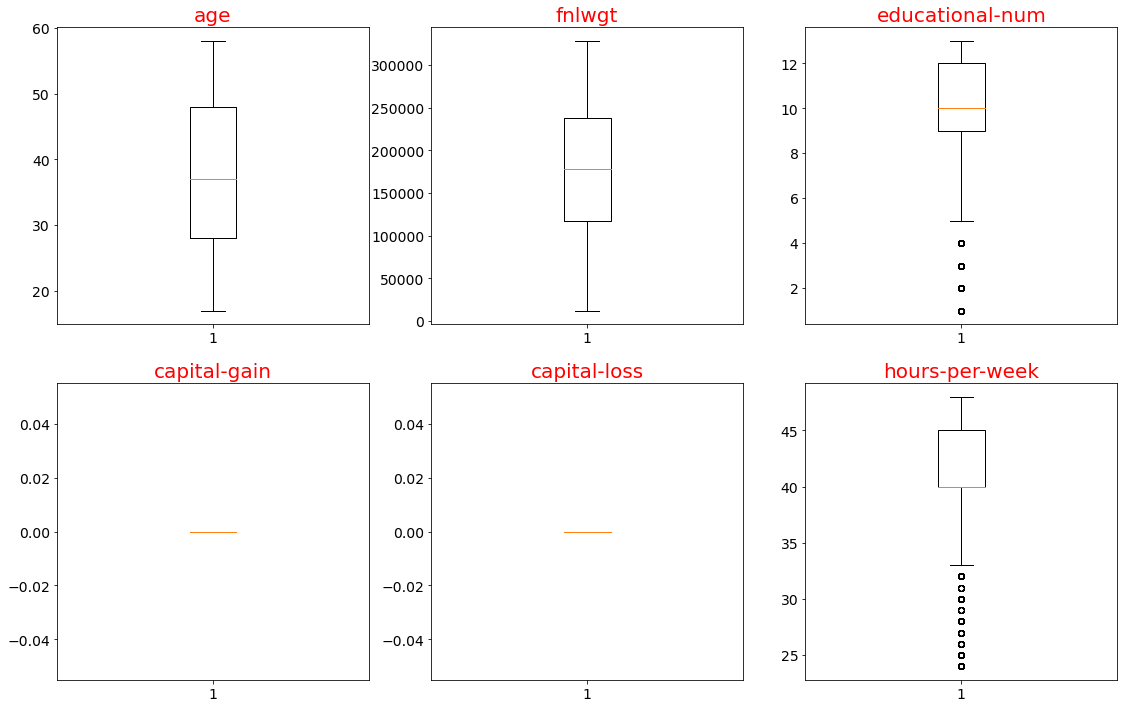

In [52]:
plt.figure(figsize=(19,12))


num_features = adult.select_dtypes(include=['int64']).columns

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.boxplot(adult[num_features[i]])
    plt.title(num_features[i],color="r",fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)

# Z-score

A Z-score is a numerical measurement that describes a value's relationship to the mean of a group of values. Z-score is measured in terms of standard deviations from the mean. If a Z-score is 0, it indicates that the data point's score is identical to the mean score

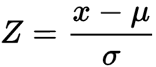


Z	=	standard score

x	=	observed value

$\mu$	=	mean of the sample

$ \sigma$	=	standard deviation of the sample

In [53]:
y=adult.std()
y

age                   12.275084
fnlwgt             84930.006592
educational-num        2.373058
capital-gain           0.000000
capital-loss           0.000000
hours-per-week         7.184808
dtype: float64

- Here we find out the standarad deviation of numerical features in our datasets

In [54]:
adult_z=(adult-x)/y
adult_z

,age,capital-gain,capital-loss,education,educational-num,fnlwgt,gender,hours-per-week,income,marital-status,native-country,occupation,race,relationship,workclass
0,-1.111486,-inf,-inf,NaN,-1.297098,0.437276,NaN,-0.058788,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.052430,-inf,-inf,NaN,-0.454304,-1.175676,NaN,1.054672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.867089,-inf,-inf,NaN,0.809888,1.634309,NaN,-0.058788,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.436365,-inf,-inf,NaN,-0.032906,-0.345474,NaN,-0.058788,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.681747,-inf,-inf,NaN,-0.032906,-1.014566,NaN,-1.450614,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.948554,-inf,-inf,NaN,0.809888,0.796395,NaN,-0.337153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48838,0.110501,-inf,-inf,NaN,-0.454304,-0.415520,NaN,-0.058788,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48839,1.576886,-inf,-inf,NaN,-0.454304,-0.444532,NaN,-0.058788,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48840,-1.355884,-inf,-inf,NaN,-0.454304,0.139242,NaN,-2.285709,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
num_varibles=[]
cat_varibles=[]
for i in adult.columns:
    if (adult[i].dtypes=='object'):
        cat_varibles.append(i)
    else:
        num_varibles.append(i)

In [56]:
num_varibles

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [57]:
cat_varibles

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

# Univariate Analysis

###### Age Distribution

<function matplotlib.pyplot.show(close=None, block=None)>

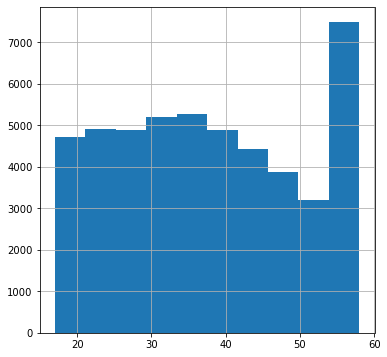

In [58]:
adult['age'].hist(figsize = (6,6))
plt.show

##### fnlwgt distribution


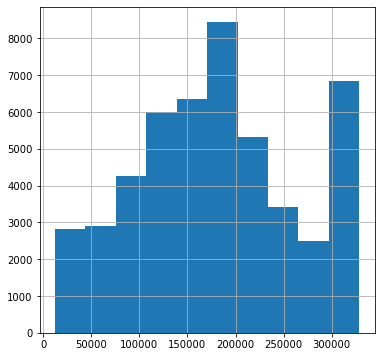

In [59]:
adult['fnlwgt'].hist(figsize=(6,6))
plt.show()

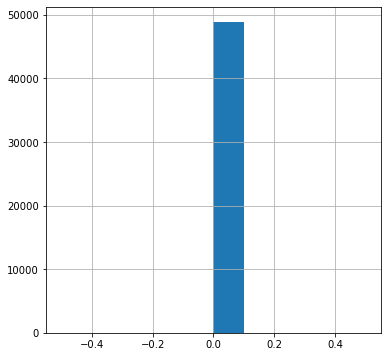

In [60]:
adult['capital-gain'].hist(figsize=(6,6))
plt.show()

**Note : By plotting the box plot each numeric column we have to find the outliers**

C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ANIL\anaconda3\lib\site-p

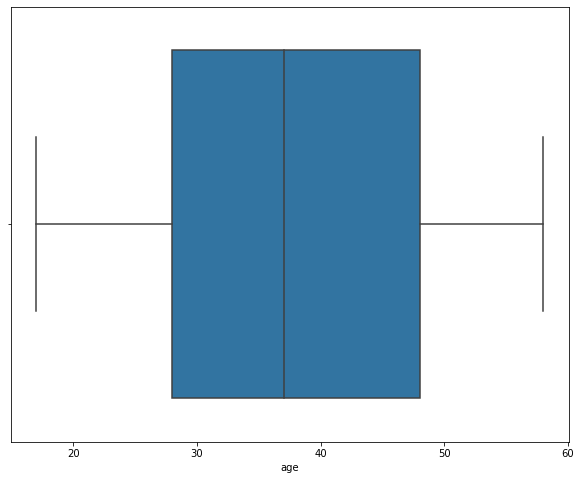

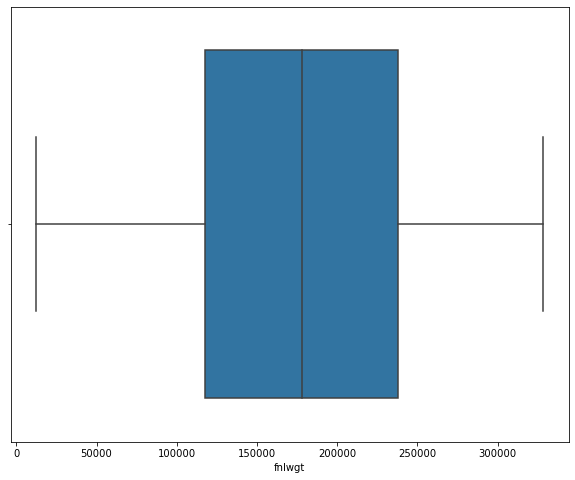

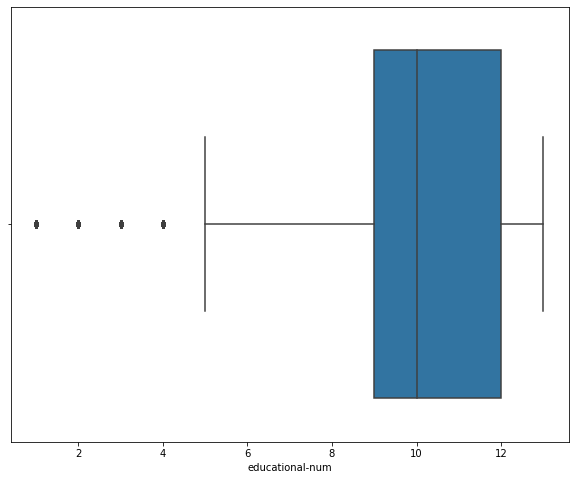

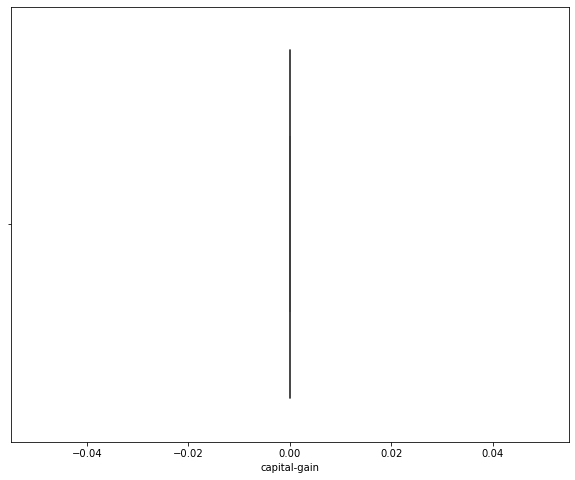

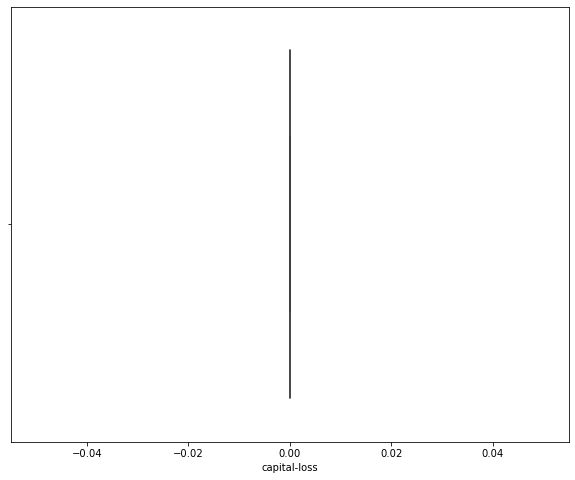

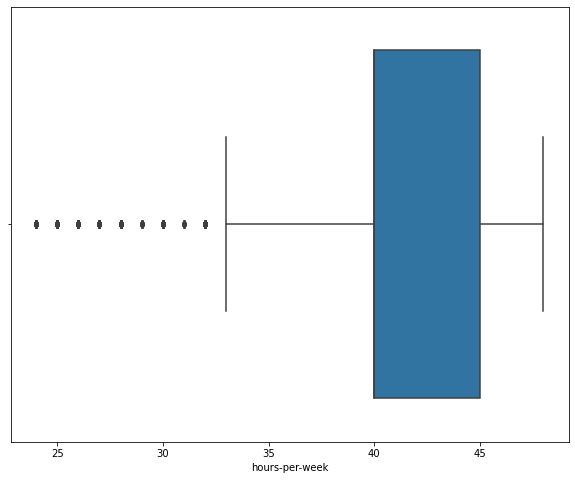

In [61]:
for i in num_varibles:
    plt.figure(figsize=(10,8))
    sns.boxplot(adult[i])

Note: By plotting the countplot we undarstand that overview of catogorical data in our dataset
    1. in our adult dataset we can observe overview ofcatorical data by using countplot 

C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ANIL\anaconda3\lib\site-p

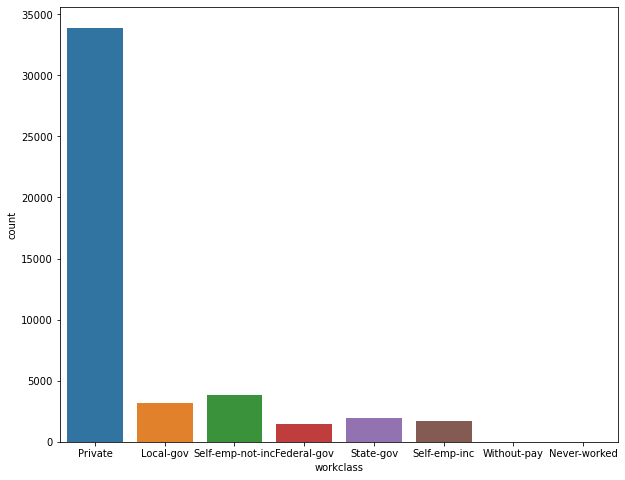

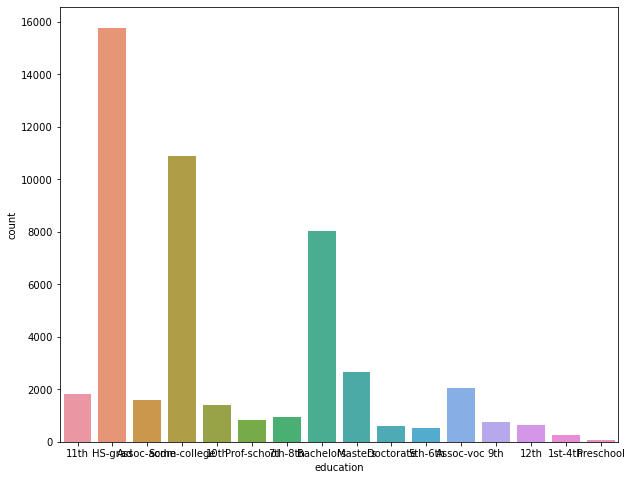

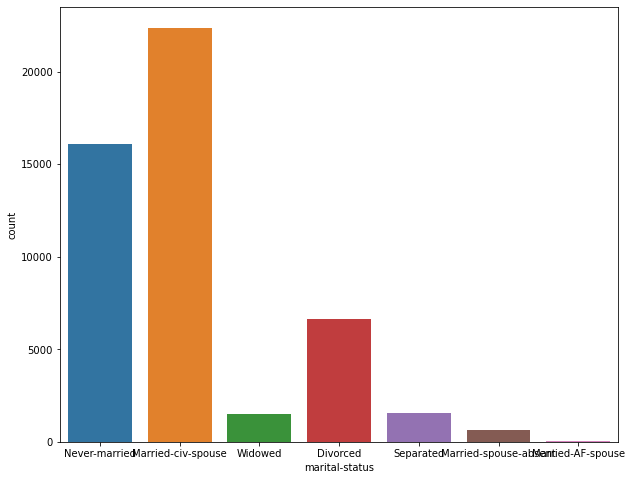

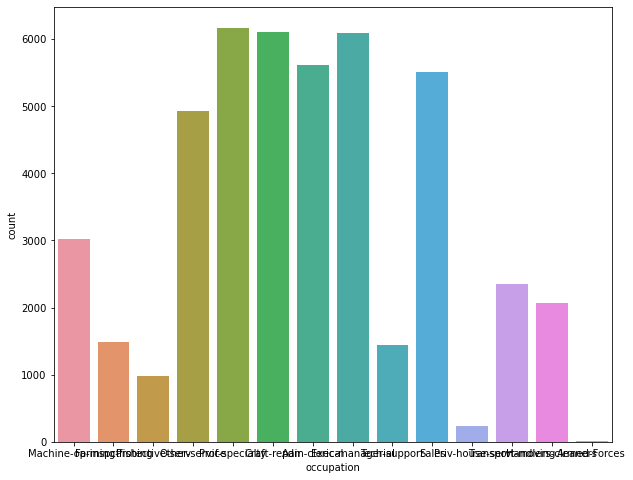

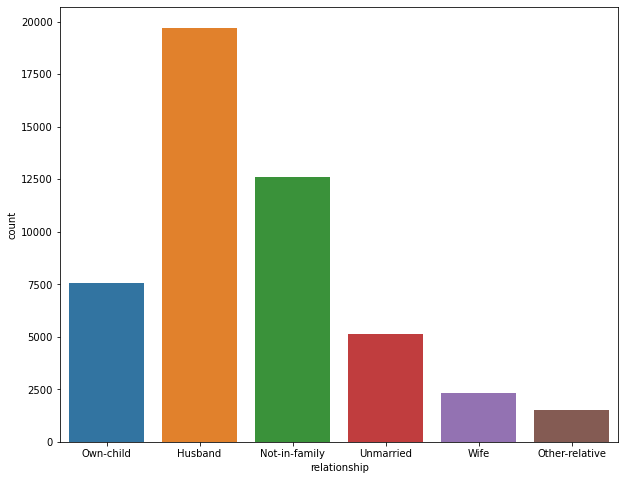

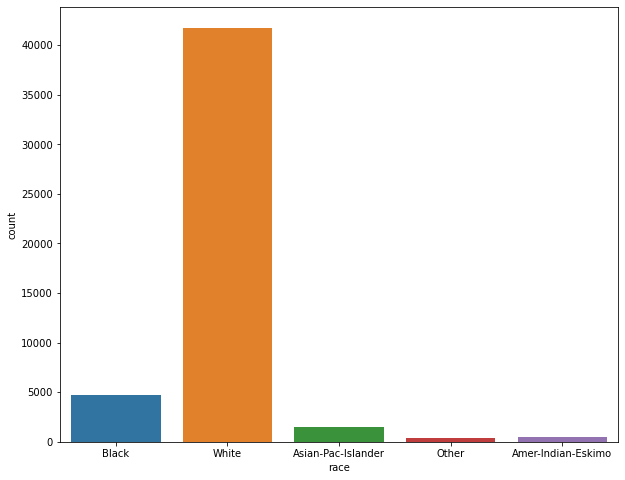

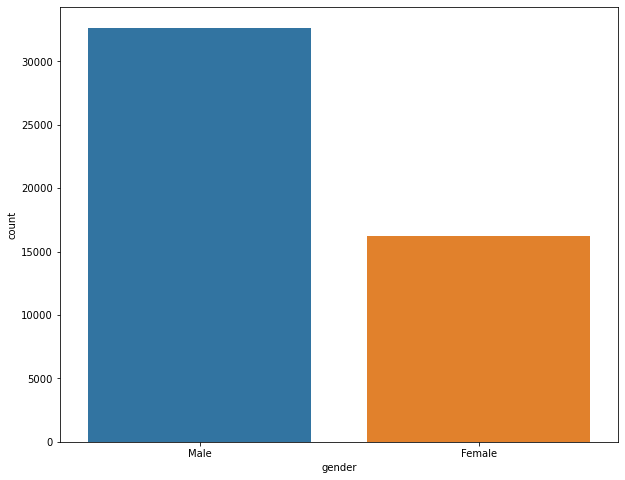

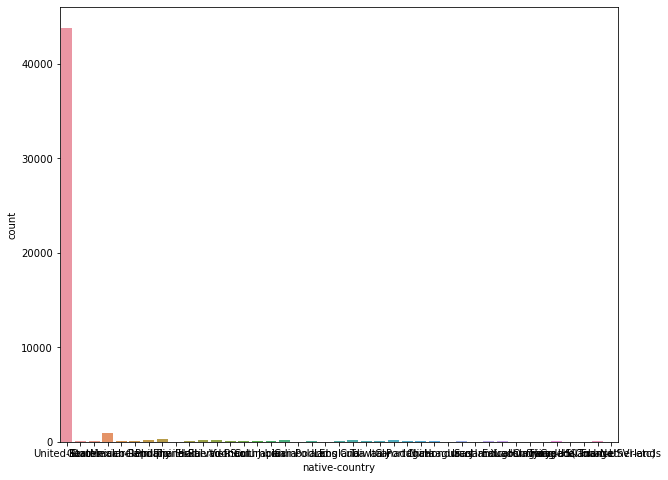

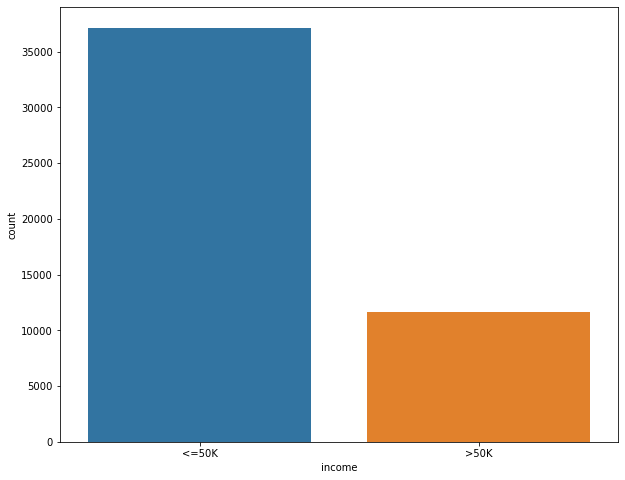

In [62]:
for i in cat_varibles:
    plt.figure(figsize=(10,8))
    sns.countplot(adult[i])

- Note: KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable.

C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


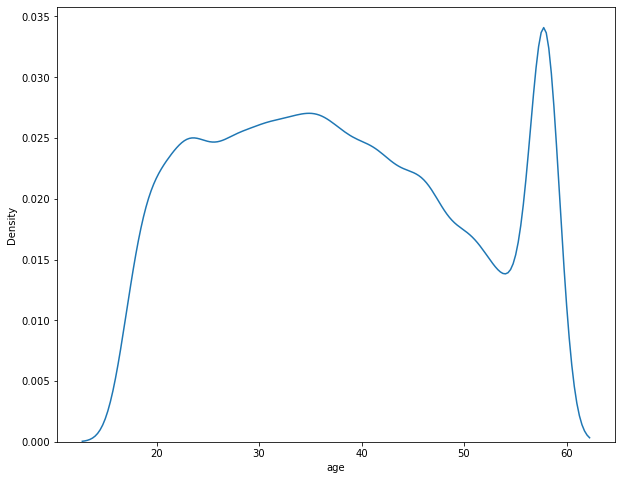

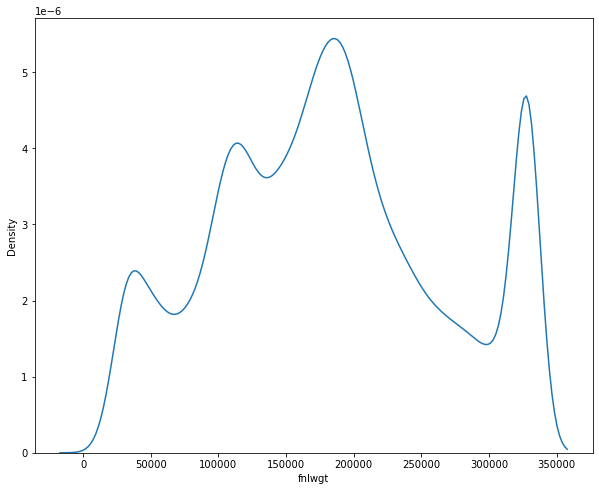

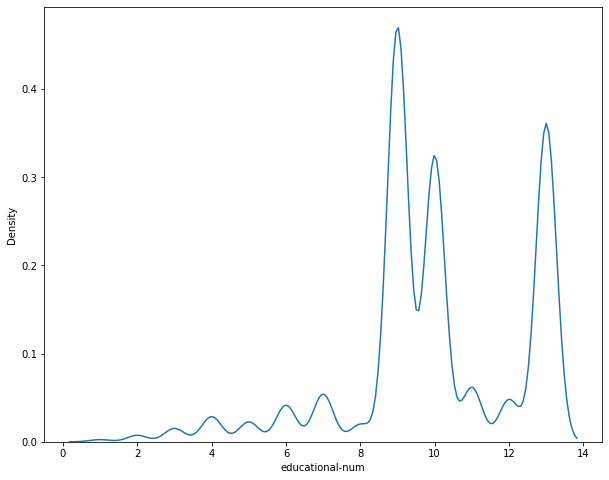

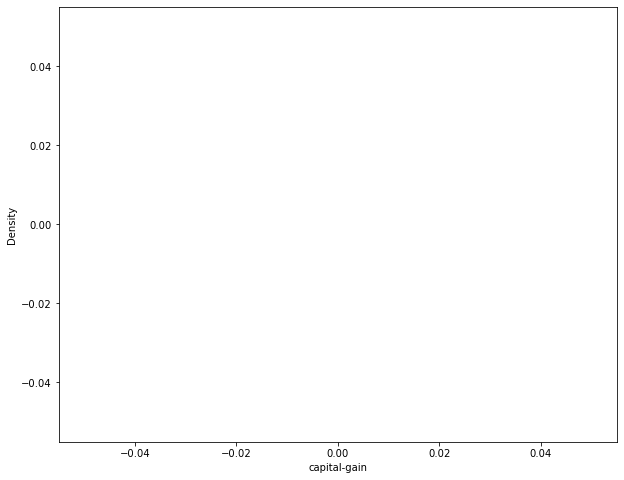

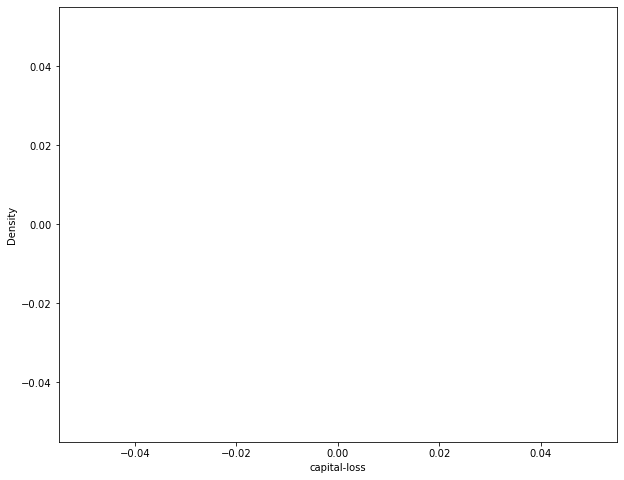

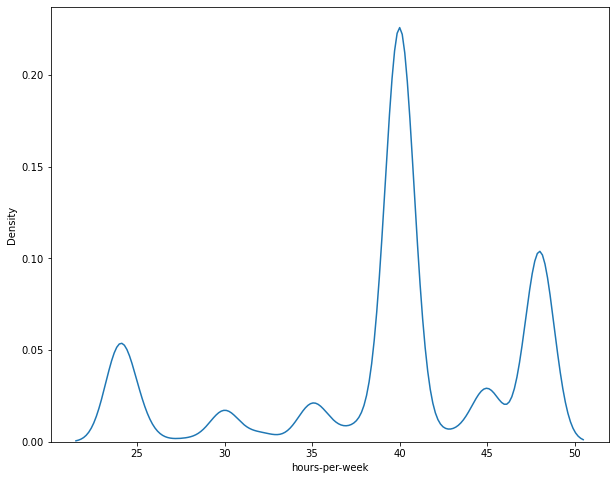

In [63]:
for i in num_varibles:
    plt.figure(figsize=(10,8))
    sns.kdeplot(x=adult[i])

# Bivariate Analysis

# Scatter plots
1. it is numerical vs numerical plots
2. its show the relation between two numerical columns 
3. example: in our dataset we compare age column with remaining numerical columns and observe the spread of data

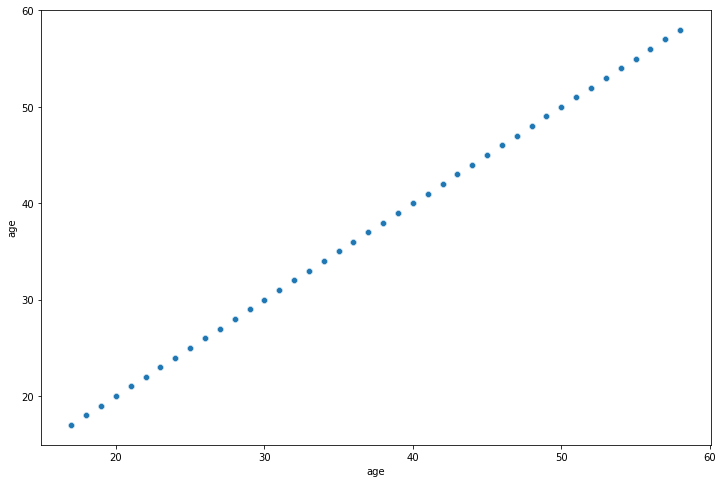

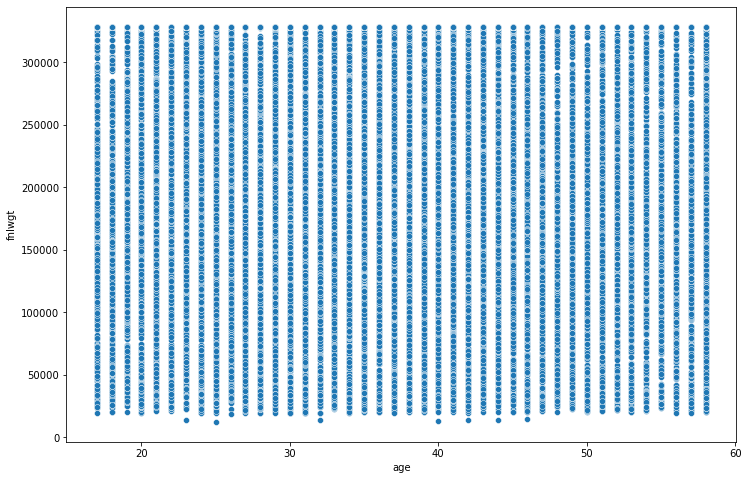

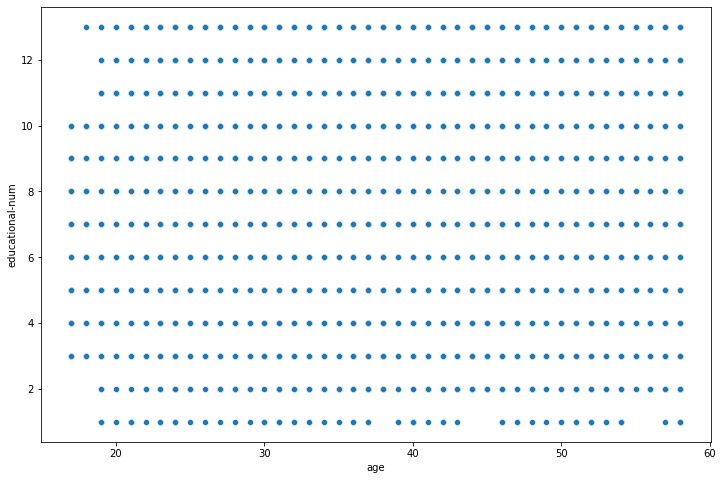

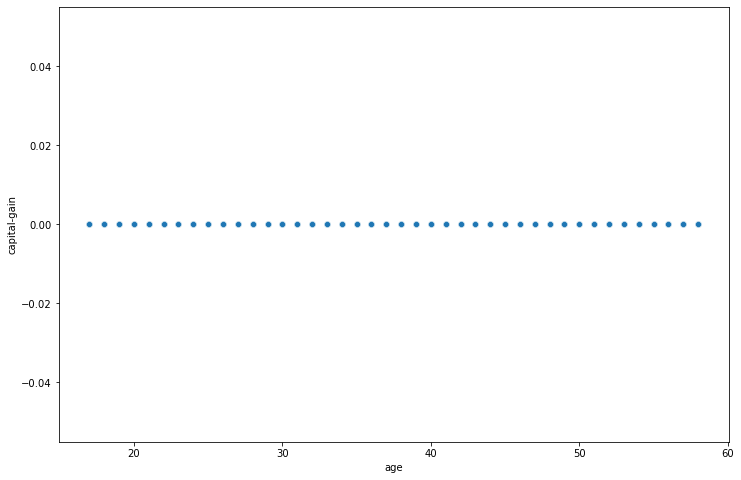

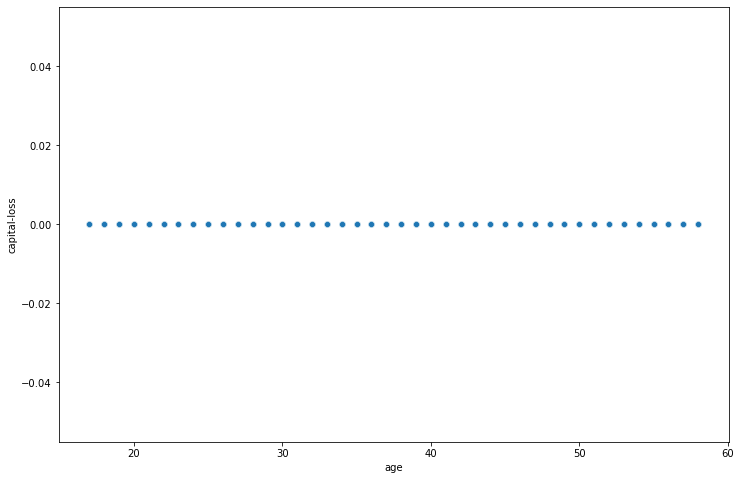

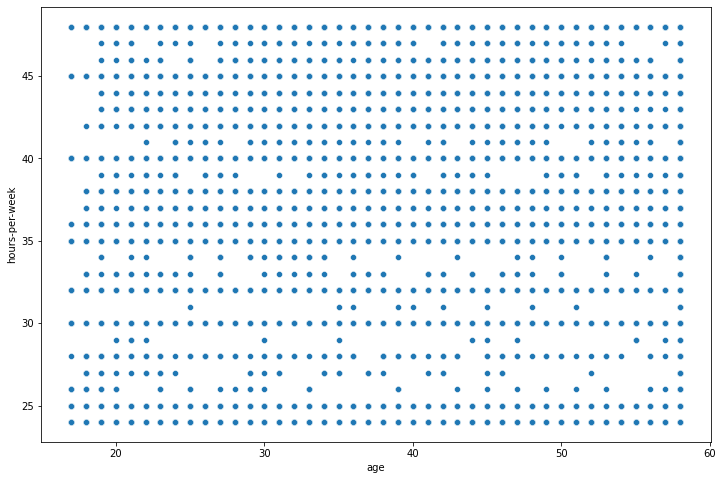

In [64]:
for i in num_varibles:
    plt.figure(figsize=(12,8))
    sns.scatterplot(x="age",y=adult[i],data=adult)
    plt.show()

# Hexbin plots
1. Hexagonal binning plots density, rather than points. Points are binned into gridded hexagons and distribution (the number of points per hexagon) is displayed using either the color or the area of the hexagons.
2. It is univariate analysis for numericalfeatures

<Figure size 720x576 with 0 Axes>

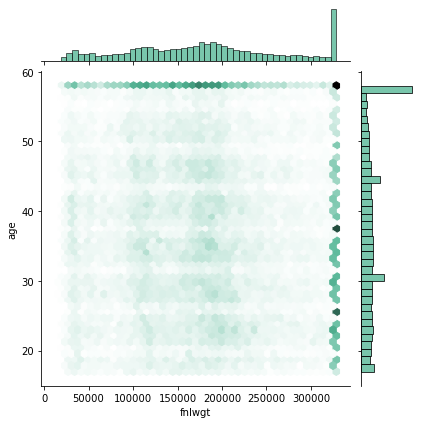

<Figure size 720x576 with 0 Axes>

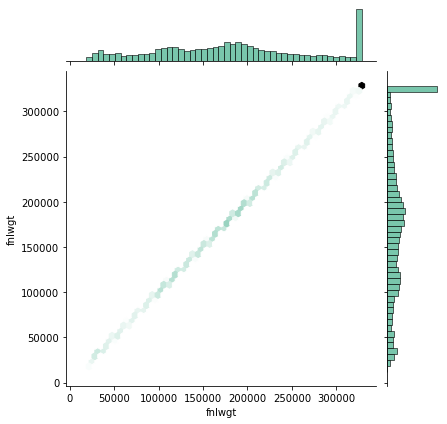

<Figure size 720x576 with 0 Axes>

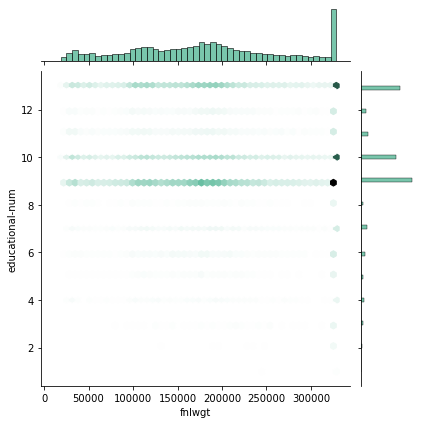

<Figure size 720x576 with 0 Axes>

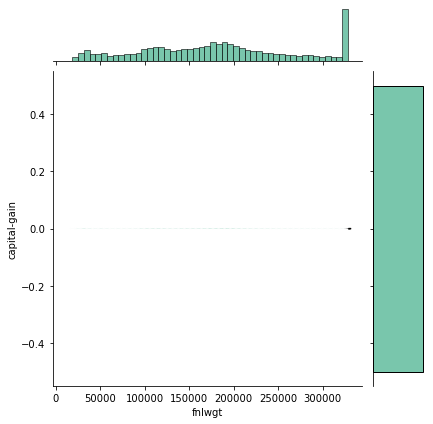

<Figure size 720x576 with 0 Axes>

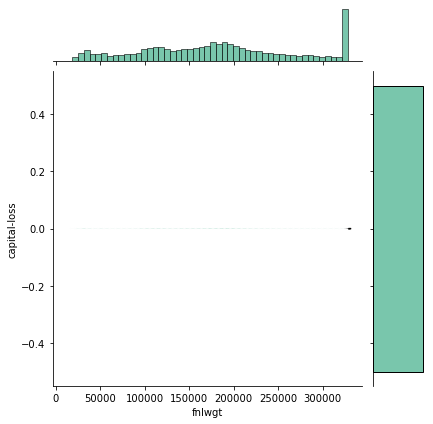

<Figure size 720x576 with 0 Axes>

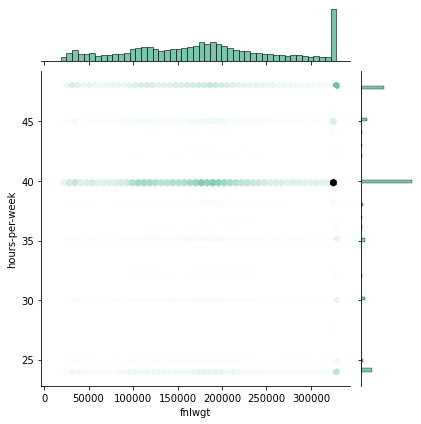

In [67]:
for i in num_varibles:
    plt.figure(figsize=(10,8))
    sns.jointplot(data=adult, x="fnlwgt", y=adult[i], kind="hex",color="#4CB391")
    plt.show()

# Pairplot
1. pairplots is multi variate analysis plot
2. its showing relation between total columns in single visualisation
3. its tells the what we have contain in total dataset

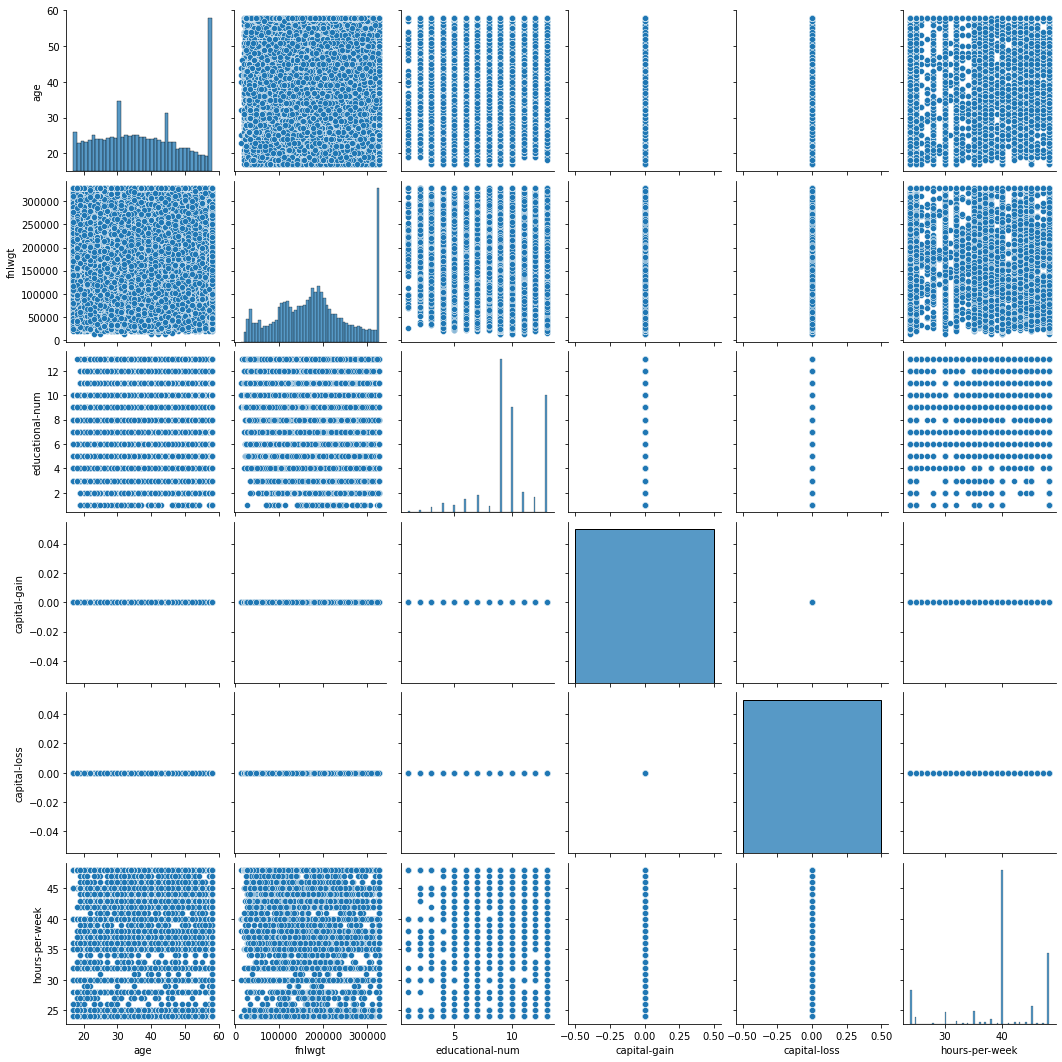

In [68]:
sns.pairplot(adult)

# Box Plot
1. its bivariate boxplot that means its shows the relation between the categorical vs numerical featues in dataset

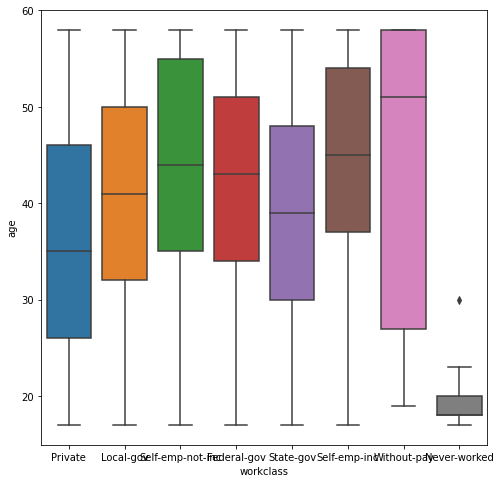

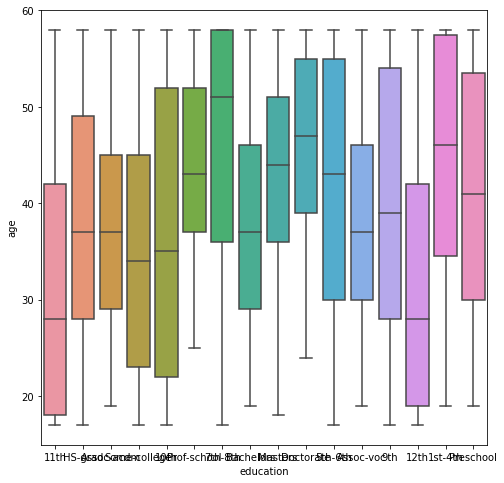

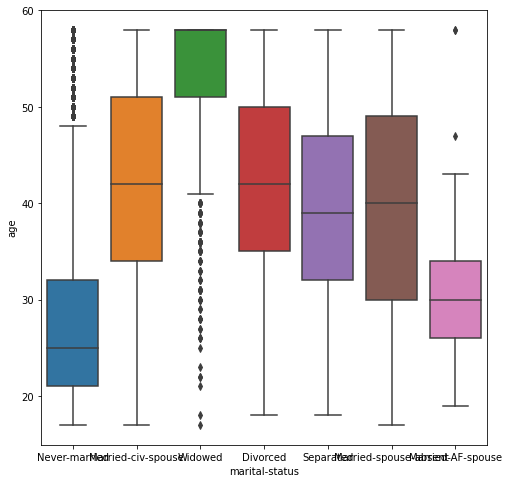

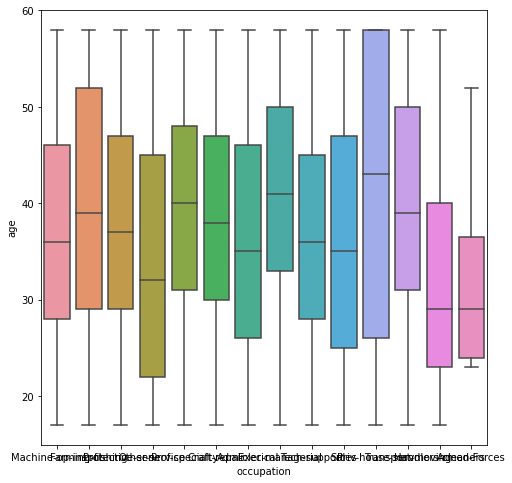

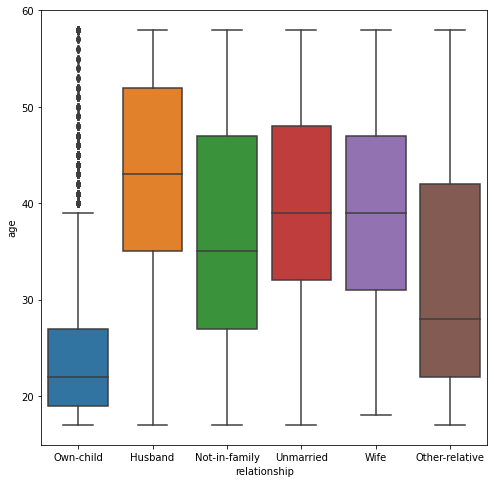

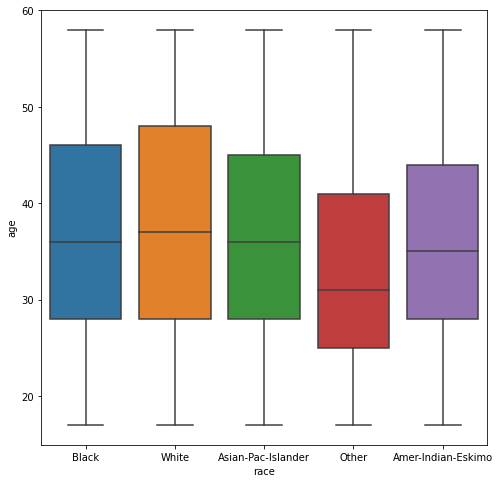

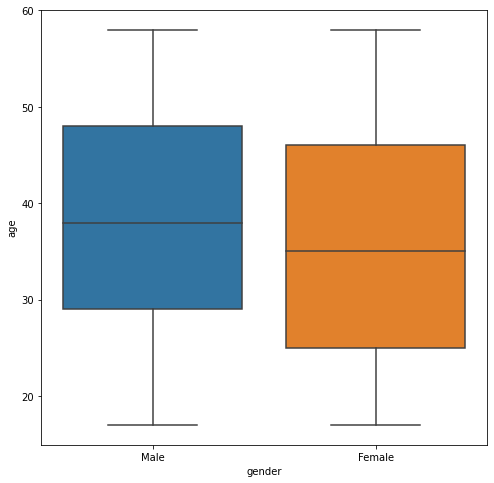

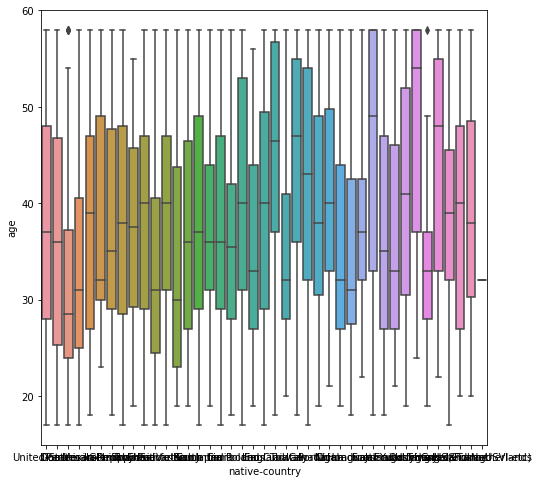

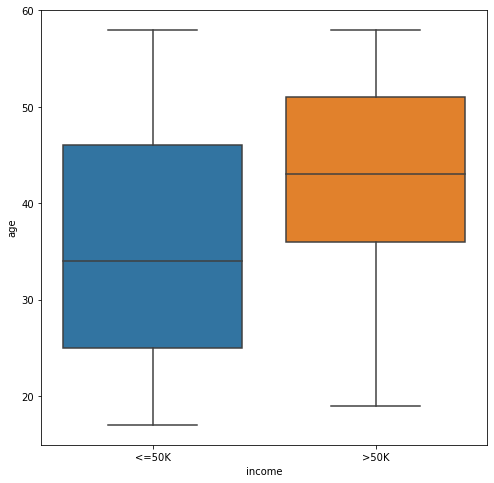

In [69]:
for i in cat_varibles:
    plt.figure(figsize=(8,8))
    sns.boxplot(x=adult[i], y='age',data=adult)
    plt.show()

# Bar Plot
1. barplot is clearly shows that relation between catogorical and numerical its a bi variate analysis plot
2. its having one more advantage its shows the lower and higher passible values in the graph

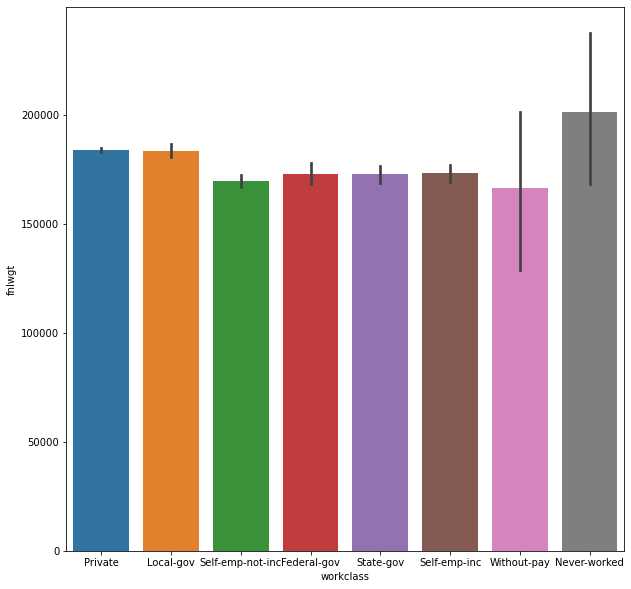

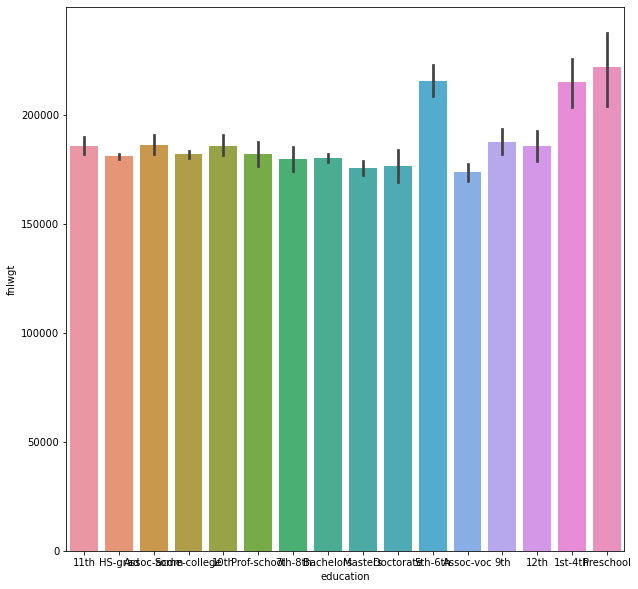

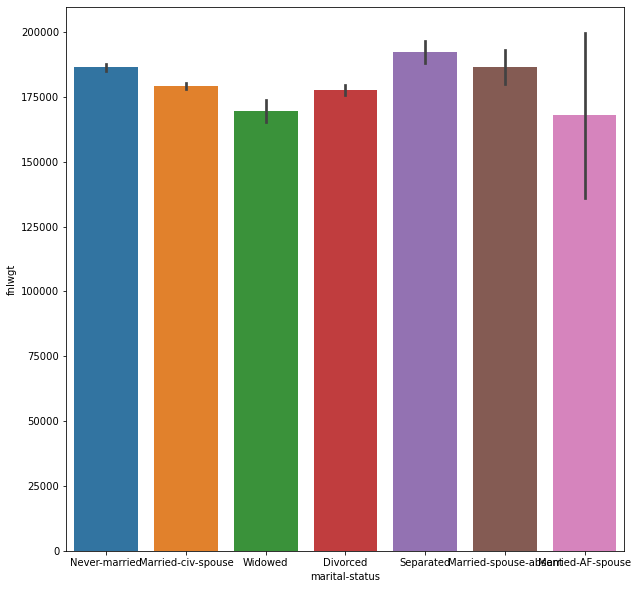

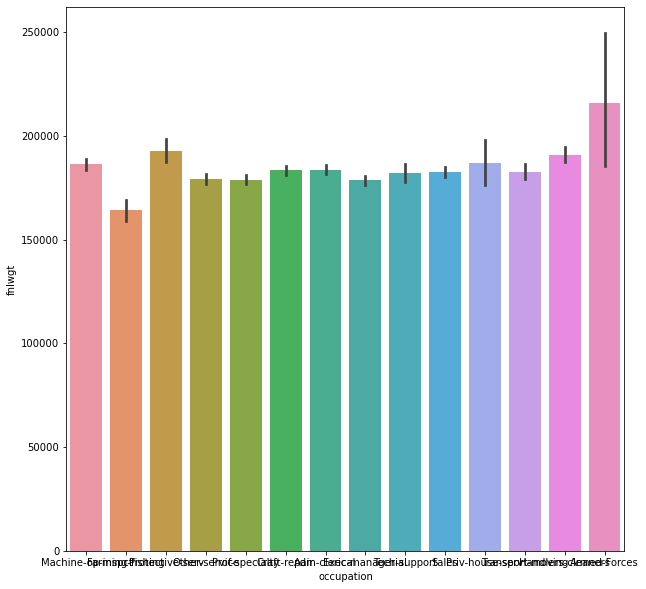

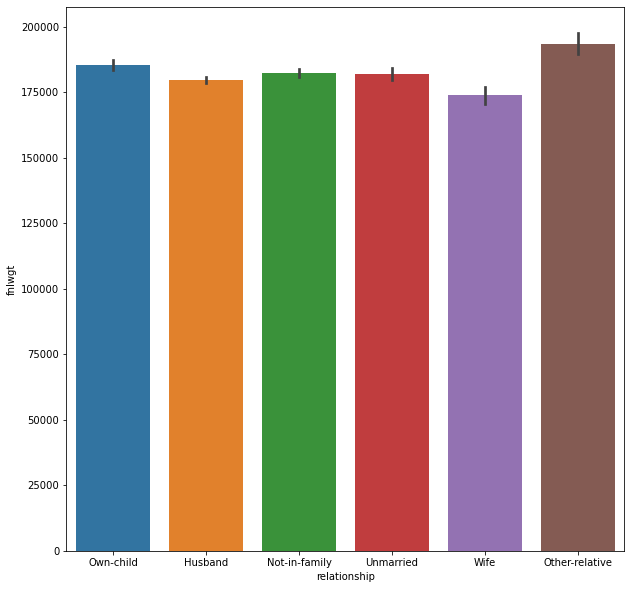

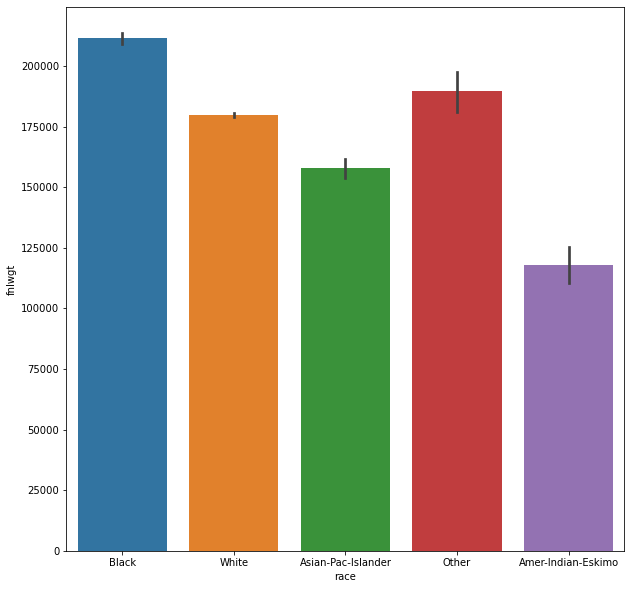

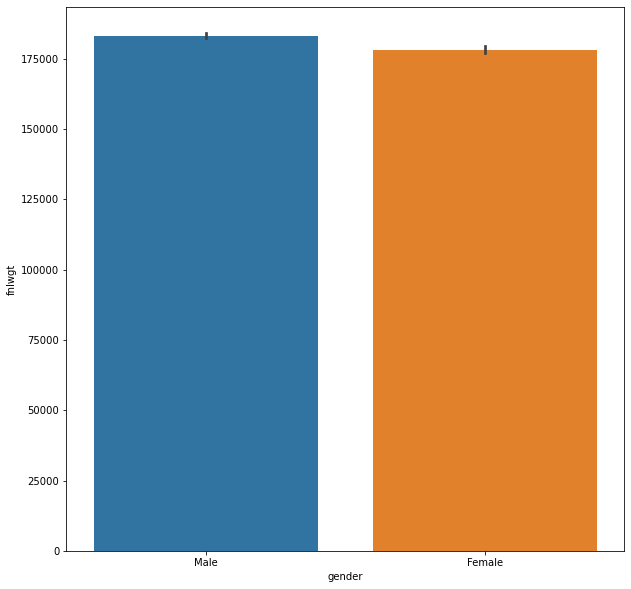

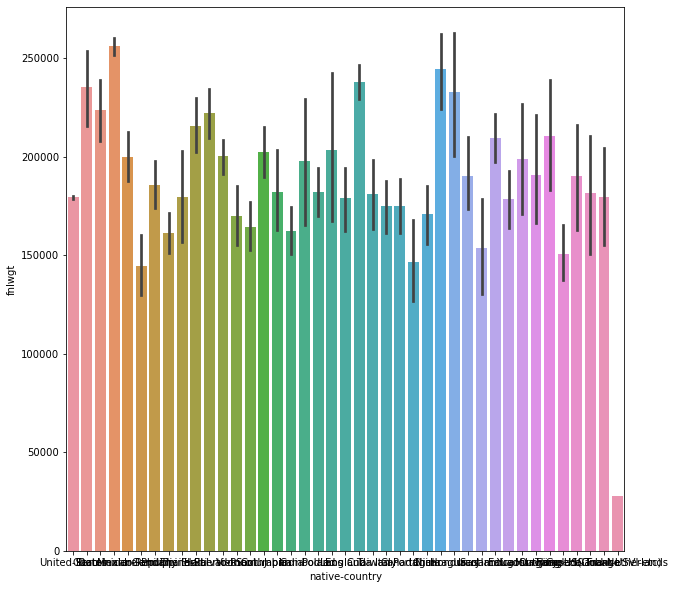

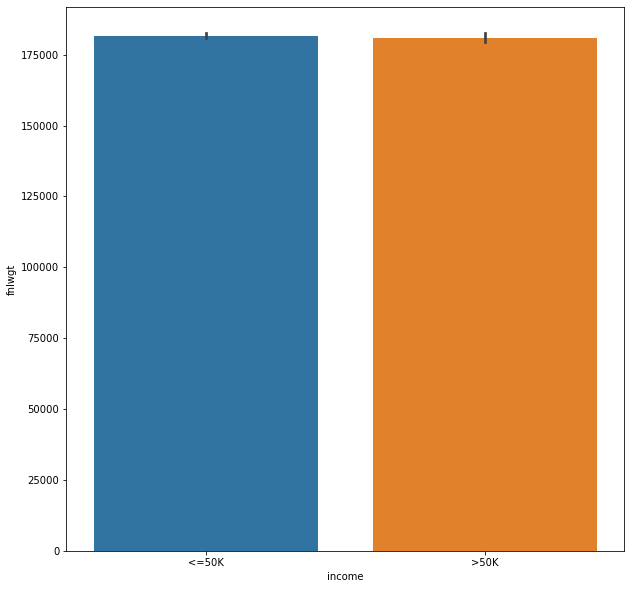

In [70]:
for i in cat_varibles:
    plt.figure(figsize=(10,10))
    sns.barplot(x=adult[i], y='fnlwgt',data=adult)
    plt.show()

# Strip Polt
1. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.
2. its also bivariate plot catogical vs numerical

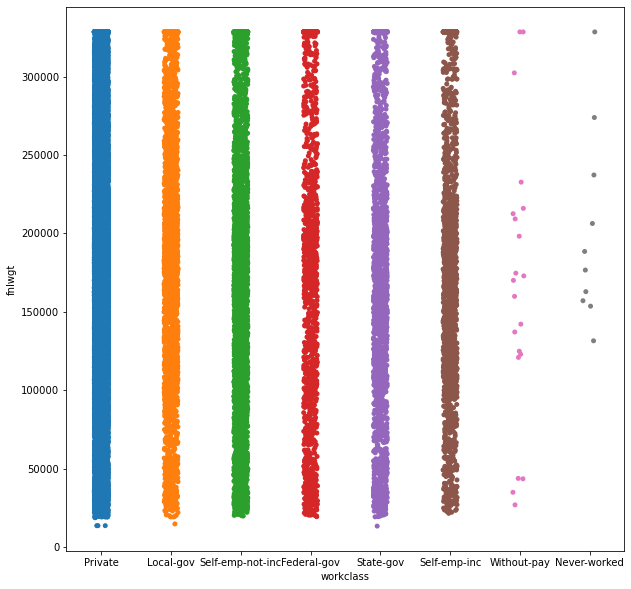

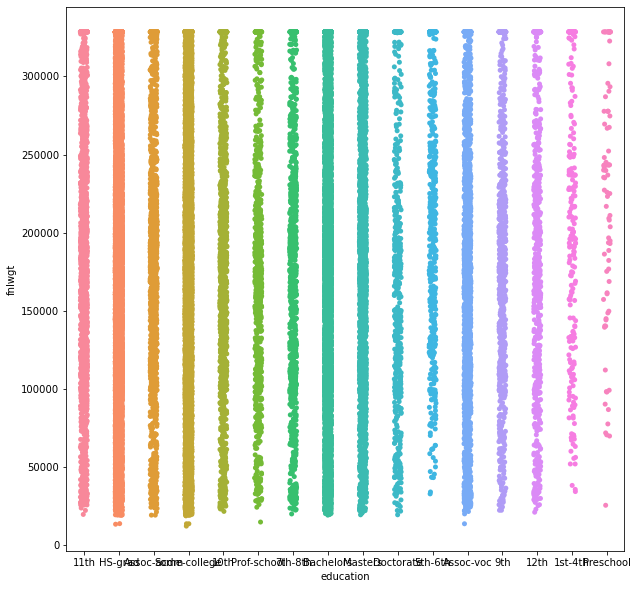

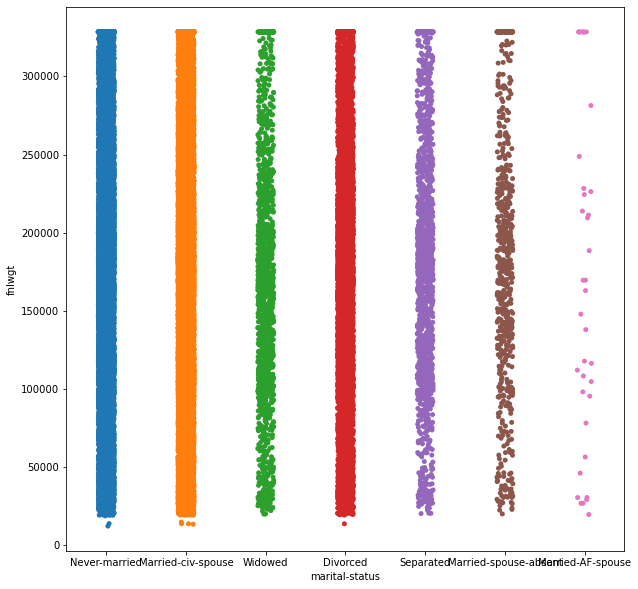

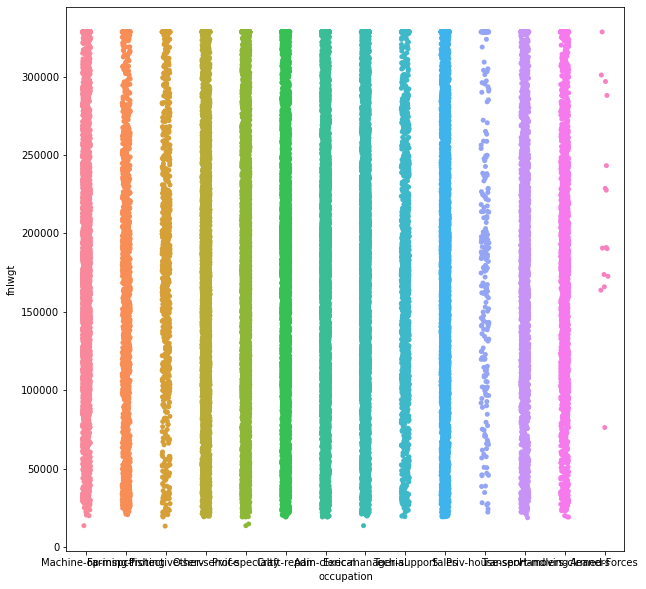

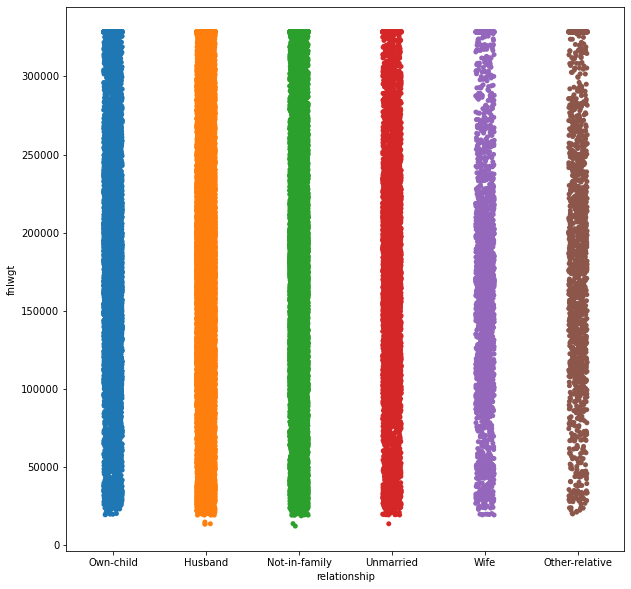

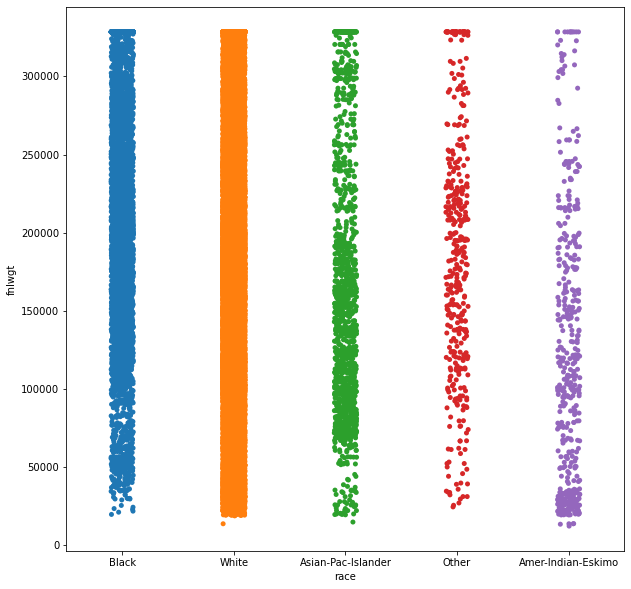

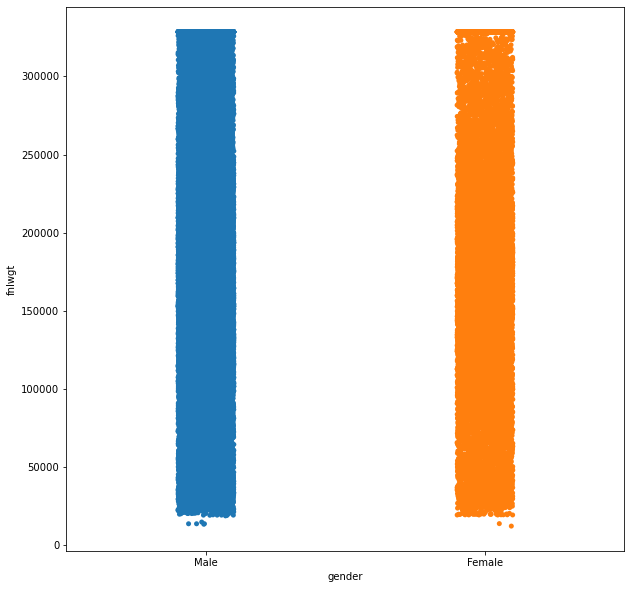

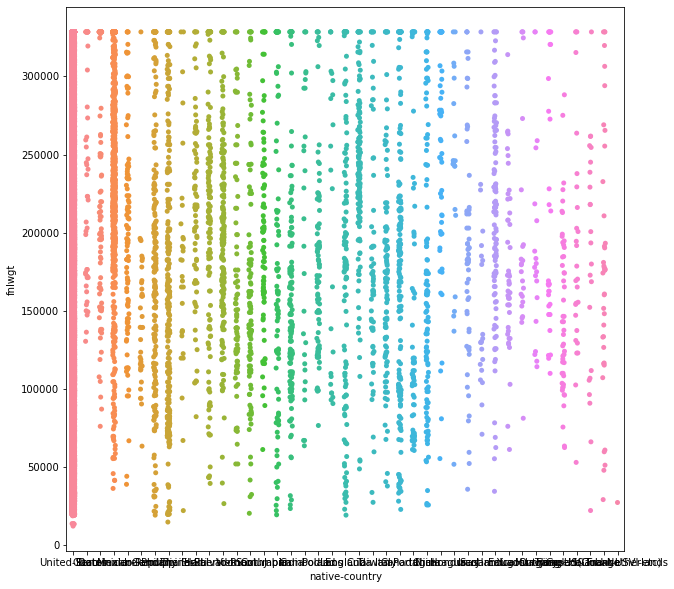

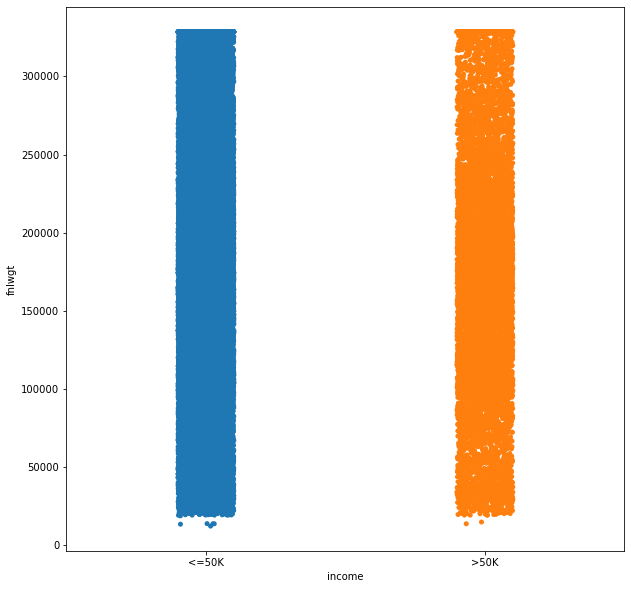

In [71]:
for i in cat_varibles:
    plt.figure(figsize=(10,10))
    sns.stripplot(x=adult[i], y='fnlwgt',data=adult)
    plt.show()

# Numerical Features Column For Standardization


In [72]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [73]:
X=adult[['fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']]
Y=adult['age']

print(X.head())

   fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week
0  226802                7             0             0              40
1   89814                9             0             0              48
2  328466               12             0             0              40
3  160323               10             0             0              40
4  103497               10             0             0              30


Note: here X= training data
           Y= testing data

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [75]:
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

In [76]:
num_cols=['fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']
for i in num_cols:
    scale = StandardScaler().fit(X_train_stand[[i]])
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [78]:
missing_val_count_by_column = (adult.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

workclass         2799
occupation        2809
native-country     857
dtype: int64


In [79]:
X_train_stand

,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
3507,-0.391158,-2.503875,0.0,0.0,0.087459
38847,0.043973,-0.401932,0.0,0.0,0.087459
28387,-0.087786,0.018456,0.0,0.0,-2.130960
20211,1.725104,-0.401932,0.0,0.0,-2.130960
47739,1.557274,-0.401932,0.0,0.0,1.196669
...,...,...,...,...,...
10812,0.754595,0.018456,0.0,0.0,0.087459
37256,-0.961338,0.018456,0.0,0.0,-1.021750
855,-1.087528,0.859233,0.0,0.0,-0.605797
27431,1.421238,0.018456,0.0,0.0,0.087459


In [80]:
X_test_stand

,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
24140,-0.078939,0.018456,0.0,0.0,1.196669
35577,-0.052208,-0.401932,0.0,0.0,-2.130960
42355,-0.722729,1.279622,0.0,0.0,1.196669
8465,-0.760786,0.859233,0.0,0.0,0.087459
37898,0.011415,0.018456,0.0,0.0,0.087459
...,...,...,...,...,...
18137,-1.487094,1.279622,0.0,0.0,1.196669
29519,-0.162231,1.279622,0.0,0.0,-0.189843
30579,-0.448637,-2.083486,0.0,0.0,-0.189843
41794,0.093086,-0.401932,0.0,0.0,1.196669


# Using Dummy variables For Categorical Data

In [81]:
adult["gender"] = adult.gender.map({'Male':1,'Female':0})

In [82]:
adult["race"] = adult.race.map({'Black':1,'White':0})

In [83]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,1.0,1,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,0.0,1,0,0,48,United-States,<=50K
2,28,Local-gov,328466,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,0.0,1,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,1.0,1,0,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,0.0,0,0,0,30,United-States,<=50K


In [84]:
pd.get_dummies(adult,columns=["race","gender",])

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,income,race_0.0,race_1.0,gender_0,gender_1
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,0,0,40,United-States,<=50K,0,1,0,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,0,0,48,United-States,<=50K,1,0,0,1
2,28,Local-gov,328466,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,0,0,40,United-States,>50K,1,0,0,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,0,0,40,United-States,>50K,0,1,0,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,0,0,30,United-States,<=50K,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,0,0,38,United-States,<=50K,1,0,1,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,0,0,40,United-States,>50K,1,0,0,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,0,0,40,United-States,<=50K,1,0,1,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,0,0,24,United-States,<=50K,1,0,0,1


In [85]:
adult.gender.head()

0    1
1    1
2    1
3    1
4    0
Name: gender, dtype: int64

# Prove Central Limit Theorem on ‘age’ 

In [86]:
from scipy.stats import norm 
age=np.array(adult.age)

C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Age'}, xlabel='Value in $'>

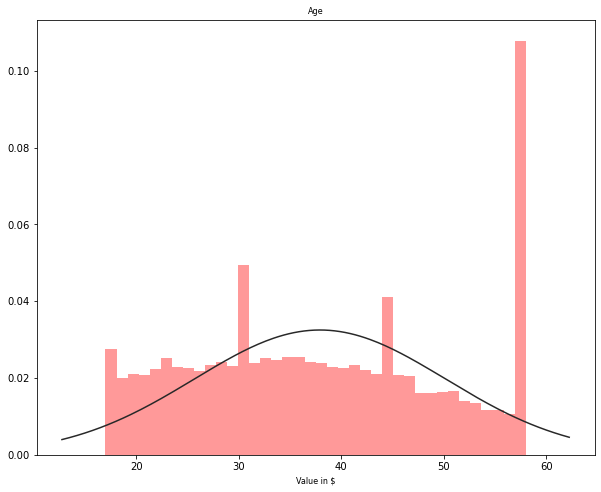

In [87]:
plt.figure(figsize=(10, 8))
plt.title('Age', size=8)
plt.xlabel('Value in $', size=8)
sns.distplot(age, fit=norm, color='red', kde=False)

In [88]:
sample_num = 1000
sample_size = 30

mean_sample_values = []

for i in range(sample_num):
    sample_mean = np.mean(np.random.choice(age, sample_size, replace=True))
    mean_sample_values.append(sample_mean) 

C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Sample Mean of Age'}, xlabel='Value in $'>

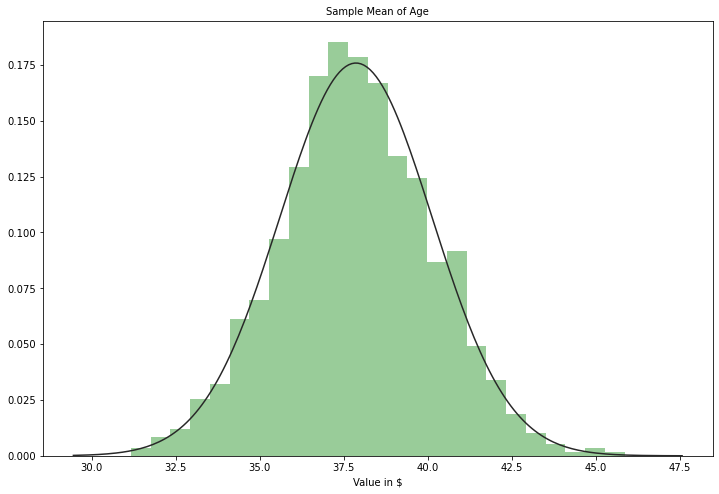

In [89]:
plt.figure(figsize=(12, 8))
plt.title('Sample Mean of Age', size=10)
plt.xlabel('Value in $', size=10)
sns.distplot(mean_sample_values, fit=norm, color='g', kde=False)

Plotting the sample means distribution, which approaches a normal distribution. As we can see, the central limit theorem is indeed true

# Chi Square Test For Relationship between Occupation and gender

In [90]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [91]:
adult.gender.value_counts()

1    32650
0    16192
Name: gender, dtype: int64

In [92]:
adult.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [93]:
pd.crosstab(adult.occupation, adult.gender, margins=True)

gender,0,1,All
occupation,,,
Adm-clerical,3769,1842,5611
Armed-Forces,0,15,15
Craft-repair,323,5789,6112
Exec-managerial,1748,4338,6086
Farming-fishing,95,1395,1490
Handlers-cleaners,254,1818,2072
Machine-op-inspct,804,2218,3022
Other-service,2698,2225,4923
Priv-house-serv,228,14,242


In [94]:
observed = pd.crosstab(adult.occupation,adult.gender)
observed

gender,0,1
occupation,,
Adm-clerical,3769,1842
Armed-Forces,0,15
Craft-repair,323,5789
Exec-managerial,1748,4338
Farming-fishing,95,1395
Handlers-cleaners,254,1818
Machine-op-inspct,804,2218
Other-service,2698,2225
Priv-house-serv,228,14


In [95]:
chi2_contingency(observed)

(8690.69415082913,
 0.0,
 13,
 array([[1818.48910564, 3792.51089436],
        [   4.86140378,   10.13859622],
        [1980.85999175, 4131.14000825],
        [1972.43355853, 4113.56644147],
        [ 482.8994417 , 1007.1005583 ],
        [ 671.5219082 , 1400.4780918 ],
        [ 979.41081398, 2042.58918602],
        [1595.51271914, 3327.48728086],
        [  78.43064758,  163.56935242],
        [2000.30560685, 4171.69439315],
        [ 318.58399409,  664.41600591],
        [1783.81109204, 3720.18890796],
        [ 468.63932396,  977.36067604],
        [ 763.24039276, 1591.75960724]]))

In [96]:
chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
adult_data= chi2_contingency(observed)[2]

In [97]:
alpha = 1 - 0.90

chi2_critical = chi2.ppf(1 - alpha, adult_data)

chi2_critical

19.81192930712756

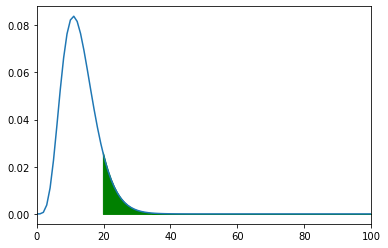

In [98]:
x_min = 0
x_max = 100

x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, adult_data)
plt.xlim(x_min, x_max)
plt.plot(x, y)

chi2_critical_right = chi2_critical

x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, adult_data)
plt.fill_between(x1, y1, color='green')

In [99]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [100]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


###### Conclusion: Finally we are proved that our data is Reject the null Hypothesis By using chi-squre test